In [49]:
import pandas as pd

import numpy as np
from sklearn.metrics import roc_auc_score, mean_squared_error,mean_absolute_error,recall_score,max_error,f1_score, accuracy_score,confusion_matrix,r2_score,f1_score,precision_score


#results_small=pd.read_csv('DB/result/floor_result.csv')
#results=pd.read_csv('DB/result/result.csv')
#results_floor=pd.read_csv('DB/result/floor_result.csv')
results_floor=pd.read_csv('DB/result/cu_5min.csv')
result_type="location"

import seaborn as sns
sns.set(font_scale = 1)

import matplotlib.pyplot as plt
%matplotlib inline

In [50]:
results_floor=results_floor.drop('type', axis=1)

In [51]:
results_floor['Orig'].unique()

array([ 6.,  5.,  8.,  7., 10.,  3.,  1.,  9.,  4.,  2.])

In [63]:
for i, each in enumerate(results_floor.columns):
    results_floor.loc[(results_floor[each]>9)]=9
    results_floor.loc[(results_floor[each]<1)]=1
    print(results_floor[each].unique())
results_floor

[1. 5. 8. 7. 6. 9. 3. 4. 2.]
[1. 8. 9. 2. 5. 7. 4. 6.]
[1. 6. 7. 9. 5. 4. 8.]
[1. 9.]
[1. 6. 9.]
[1. 6. 7. 9. 8. 2. 4. 3. 5.]
[1. 9. 8. 7. 6. 3. 5. 4. 2.]
[1. 6. 8. 7. 9. 3. 2. 5. 4.]
[1. 7. 6. 9. 8. 3. 4. 2. 5.]
[1. 6. 8. 9. 3. 5. 4. 2. 7.]
[1 8 9 7 6 5 2 4 3]


,Orig,LogisticRegression,Linear Regression,MBSGD_C,MBSGD_R,SVR,SVC,Random Forest,xg boost,KNN,k-means
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
1,5.0,1.0,6.0,1.0,6.0,6.0,9.0,6.0,7.0,6.0,8
2,8.0,8.0,6.0,1.0,6.0,7.0,8.0,8.0,7.0,8.0,9
3,7.0,8.0,7.0,1.0,6.0,7.0,7.0,7.0,7.0,8.0,7
4,6.0,1.0,6.0,1.0,6.0,6.0,6.0,6.0,6.0,6.0,8
...,...,...,...,...,...,...,...,...,...,...,...
167191,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9
167192,5.0,8.0,5.0,1.0,6.0,5.0,5.0,5.0,6.0,5.0,7
167193,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
167194,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1


In [64]:
def evaluate(y_test, model_pred):  
    #model_pred=pro_pred(model_pred)
    #model_mae = mean_absolute_error(y_test.astype(np.float32), model_pred.astype(np.float32))
    model_mae = mean_absolute_error(y_test, model_pred)
    model_mse = mean_squared_error(y_test, model_pred)
    model_r2_score= r2_score(y_test, model_pred)
    ac_score=  accuracy_score(y_test, model_pred)
    #accuracy = np.sum(model_pred == y_test) / y_test.shape[0]
    #print('Test accuracy = {}'.format(accuracy))
    model_f1_score= f1_score(y_test, model_pred, average='micro')
    precision=  precision_score(y_test, model_pred, average='micro')
    rec_s=recall_score(y_test, model_pred, average='micro')
    return model_mae, model_mse,model_r2_score,ac_score,model_f1_score,precision,rec_s

In [65]:
cols=['model','mae', 'mse','r2_score','ac_score','f1_score','precision','recall']
model_comparison = pd.DataFrame(columns=cols)

for i, each in enumerate(results_floor.columns):
    #print(sk_results_small[each].unique())
    #knn_cnf_matrix= confusion_matrix(np.array(sk_results_small['Original']), np.array(sk_results_small[each]))
    model_mae, model_mse,model_r2_score,ac_score,model_f1_score,precision,reca_s=evaluate(np.array(results_floor['Orig']), np.array(results_floor[each]))
    newrow = pd.DataFrame([[each,model_mae, model_mse,model_r2_score,ac_score,model_f1_score,precision,reca_s]], columns=cols)
    model_comparison = model_comparison.append(newrow)
    
model_comparison= model_comparison[model_comparison.model != 'Orig']
model_comparison

,model,mae,mse,r2_score,ac_score,f1_score,precision,recall
0,LogisticRegression,2.055898,10.599524,-0.149748,0.417923,0.417923,0.417923,0.417923
0,Linear Regression,1.610266,5.299277,0.425178,0.357066,0.357066,0.357066,0.357066
0,MBSGD_C,3.371576,20.413921,-1.214332,0.354285,0.354285,0.354285,0.354285
0,MBSGD_R,1.745454,5.751101,0.376168,0.304720,0.304720,0.304720,0.304720
0,SVR,0.819087,2.433491,0.736035,0.615559,0.615559,0.615559,0.615559
0,SVC,1.006627,4.830151,0.476065,0.694861,0.694861,0.694861,0.694861
0,Random Forest,0.140924,0.261346,0.971651,0.897085,0.897085,0.897085,0.897085
0,xg boost,0.575941,1.299559,0.859035,0.658640,0.658640,0.658640,0.658640
0,KNN,0.190531,0.404902,0.956080,0.875709,0.875709,0.875709,0.875709
0,k-means,2.332735,10.714479,-0.162218,0.318034,0.318034,0.318034,0.318034


mae 0    2.055898
0    1.610266
0    3.371576
0    1.745454
0    0.819087
0    1.006627
0    0.140924
0    0.575941
0    0.190531
0    2.332735
Name: mae, dtype: float64


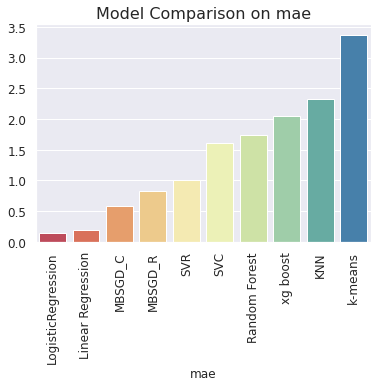

mse 0    10.599524
0     5.299277
0    20.413921
0     5.751101
0     2.433491
0     4.830151
0     0.261346
0     1.299559
0     0.404902
0    10.714479
Name: mse, dtype: float64


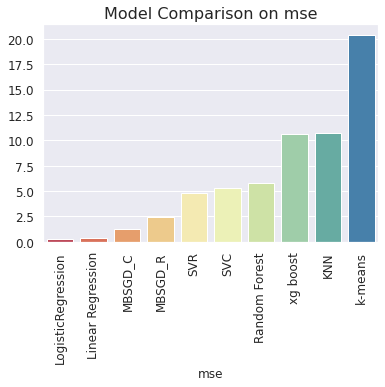

r2_score 0   -0.149748
0    0.425178
0   -1.214332
0    0.376168
0    0.736035
0    0.476065
0    0.971651
0    0.859035
0    0.956080
0   -0.162218
Name: r2_score, dtype: float64


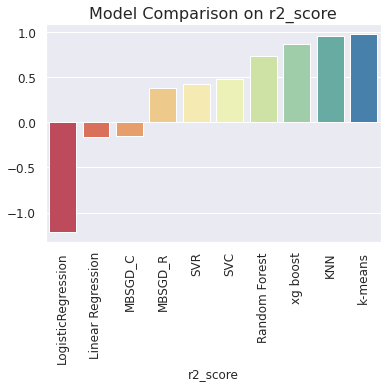

ac_score 0    0.417923
0    0.357066
0    0.354285
0    0.304720
0    0.615559
0    0.694861
0    0.897085
0    0.658640
0    0.875709
0    0.318034
Name: ac_score, dtype: float64


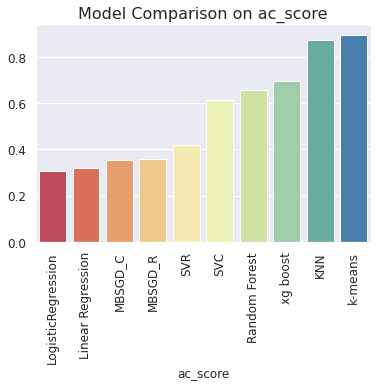

f1_score 0    0.417923
0    0.357066
0    0.354285
0    0.304720
0    0.615559
0    0.694861
0    0.897085
0    0.658640
0    0.875709
0    0.318034
Name: f1_score, dtype: float64


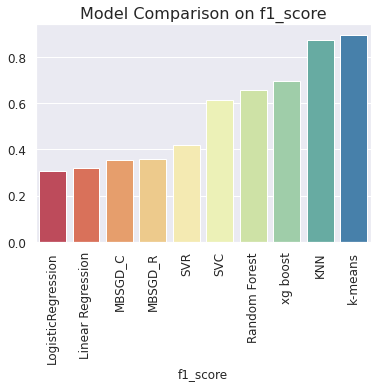

precision 0    0.417923
0    0.357066
0    0.354285
0    0.304720
0    0.615559
0    0.694861
0    0.897085
0    0.658640
0    0.875709
0    0.318034
Name: precision, dtype: float64


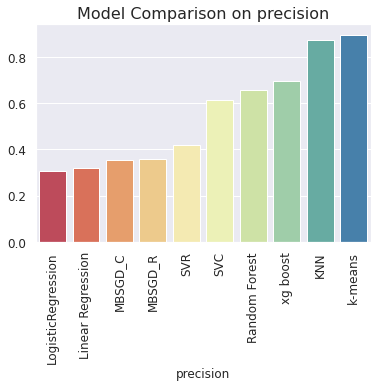

recall 0    0.417923
0    0.357066
0    0.354285
0    0.304720
0    0.615559
0    0.694861
0    0.897085
0    0.658640
0    0.875709
0    0.318034
Name: recall, dtype: float64


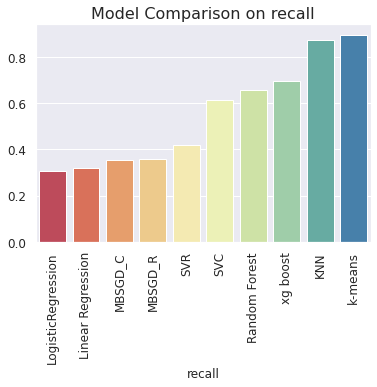

In [67]:
columns=model_comparison.columns
#sns.color_palette("Paired")
sns.color_palette("Spectral", as_cmap=True)

for i, each in enumerate(columns):
    if not each=='model' :
        each_list=model_comparison[each]
        print(each, each_list)
        
        sns.barplot(x='model', y=each_list.sort_values(ascending = True), data=model_comparison,palette="Spectral")
        
        #model_comparison.sort_values(each, ascending = False).plot(x = 'model', y = each, kind = 'barh',
                                                           #color = 'green', edgecolor = 'black')
        plt.ylabel('');
        plt.yticks(size = 12);
        plt.xlabel(each); plt.xticks(size = 12,rotation=90)
        plt.title('Model Comparison on '+each, size = 16);
        plt.show()

In [45]:
print(result_type)

location


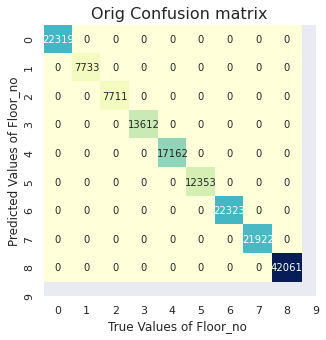

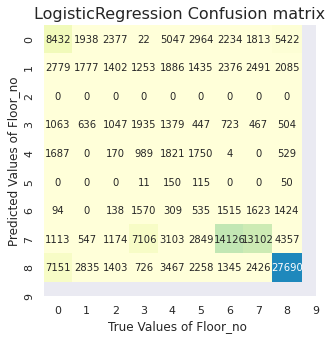

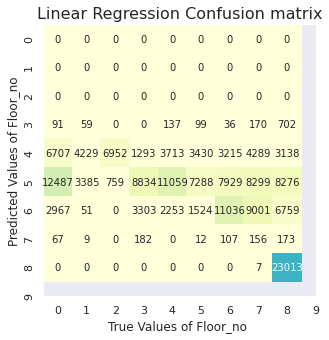

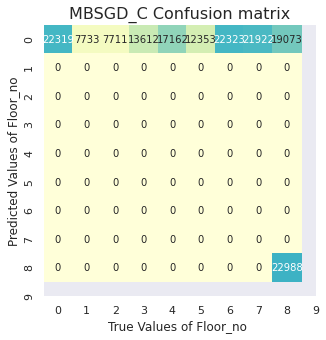

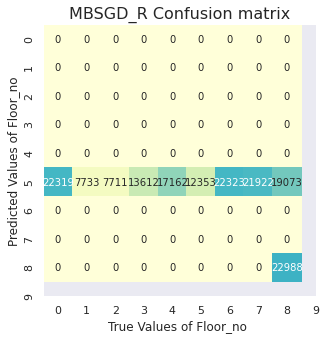

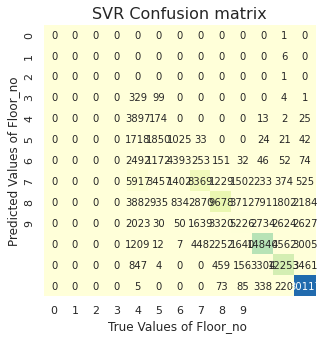

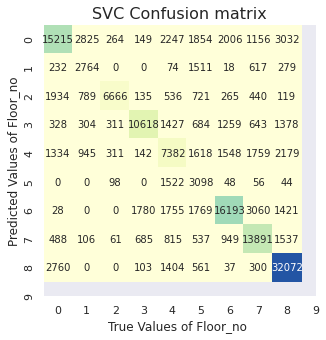

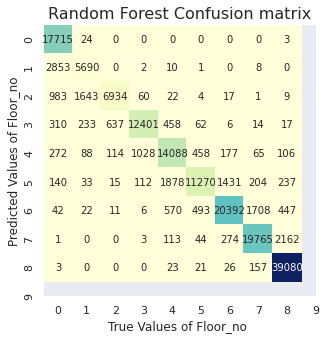

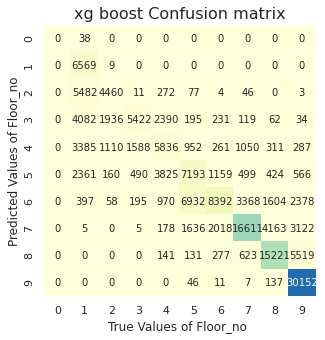

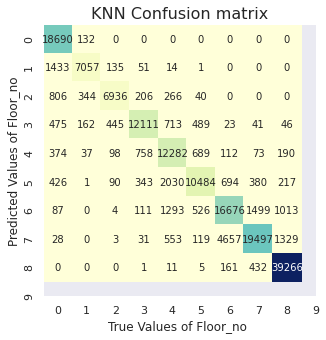

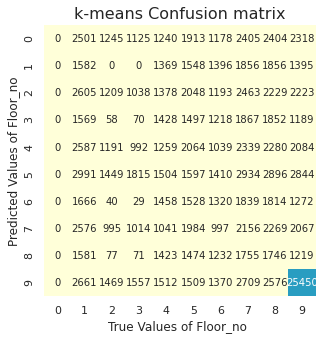

In [60]:
#figsize(5, 5)
columns=results_floor.columns

if result_type=="location":
    label=[0,1,2,3,4,5,6,7,8,9]
else:
    label=[0,1,2,3,4]
    
for i, each in enumerate(columns):
    #print(model_comparison[each].unique())
    knn_cnf_matrix= confusion_matrix(np.array(results_floor['Orig']), np.array(results_floor[each]))
    plt.figure(figsize=(5,5))
    sns.heatmap(knn_cnf_matrix.T, square=True, annot=True, cbar=False,cmap="YlGnBu",fmt='g',vmin=5000, vmax=40000,
            xticklabels=label, yticklabels=label,annot_kws={"size": 10})
    plt.xlabel('True Values of Floor_no ')
    plt.ylabel('Predicted Values of Floor_no')
    plt.title(each+' Confusion matrix', size = 16);